In [1]:
from __future__ import annotations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import urllib.request as url
import pytz
import os
from IPython.display import display as ipdisplay

import sys
sys.path.append('..')
from data_processing.data_import import Elmy_import, test_equal
from visualization.visualize import visualize_nan
from interpolation.low_rank_interpolation import low_rank_interpolation
from interpolation.auto_regressive_interpolation import ar_interpolation_multiple_nan_seq, ar_interpolation

# Import the data

In [2]:
X_train_clean = Elmy_import('../data/processed/X_train_full_clean.csv', with_date=False)
y_train_raw = Elmy_import('../data/raw/y_train.csv', target=True)
X_test_clean = Elmy_import('../data/processed/X_test_full_clean.csv', with_date=False)
X_train = Elmy_import('../data/processed/X_train_full.csv', with_date=False)
X_test = Elmy_import('../data/processed/X_test_full.csv', with_date=False)
print(f"X_train_clean.shape {X_train_clean.shape} - X_train.shape {X_train.shape}")
print(f"X_test_raw.shape {X_test_clean.shape}   - X_test.shape {X_test.shape}")
print(f"Testing training data")
test_equal(X_train_clean, X_train)
print(f"Testing test data")
test_equal(X_test_clean, X_test)

X_train_clean.shape (10605, 22) - X_train.shape (10605, 26)
X_test_raw.shape (4942, 22)   - X_test.shape (4942, 26)
Testing training data
Same index:   True
Same columns: True
Same values:  False
Testing test data
Same index:   True
Same columns: True
Same values:  False


# ``NaN`` values

## Training data

In [3]:
# number of NaN per column
ipdisplay(pd.concat([X_train.isna().sum(), X_train_clean.isna().sum(), X_test.isna().sum(), X_test_clean.isna().sum()], axis=1, keys=['X_train', 'X_train_clean', 'X_test', 'X_test_clean']))

,X_train,X_train_clean,X_test,X_test_clean
Date (UTC),0,0.0,0,0.0
Date,0,0.0,0,0.0
load_forecast,1287,NaN,0,NaN
coal_power_available,1,0.0,0,0.0
gas_power_available,1,0.0,0,0.0
nucelear_power_available,1,0.0,0,0.0
wind_power_forecasts_average,24,0.0,0,0.0
solar_power_forecasts_average,24,0.0,24,0.0
wind_power_forecasts_std,24,0.0,0,0.0
solar_power_forecasts_std,24,0.0,24,0.0


1 / 10605 (0.01%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 1 - Largest NaN sequence: 1 - Average length of a sequence 1.00


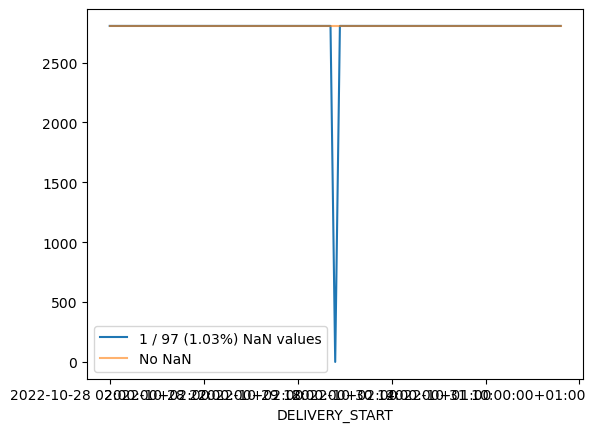

In [4]:
feature_name = 'coal_power_available'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=48, nonan_ser=X_train_clean[feature_name])

1 / 10605 (0.01%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 1 - Largest NaN sequence: 1 - Average length of a sequence 1.00


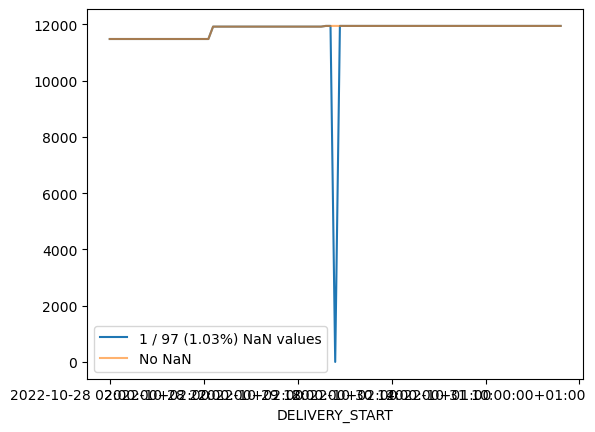

In [5]:
feature_name = 'gas_power_available'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=48, nonan_ser=X_train_clean[feature_name])

1 / 10605 (0.01%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 1 - Largest NaN sequence: 1 - Average length of a sequence 1.00


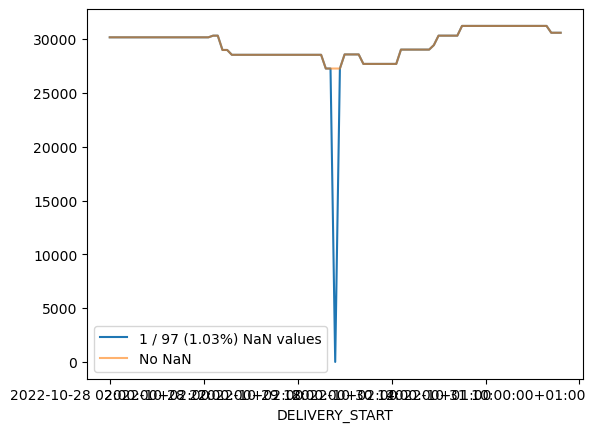

In [6]:
feature_name = 'nucelear_power_available'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=48, nonan_ser=X_train_clean[feature_name])

24 / 10605 (0.23%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 24 - Largest NaN sequence: 24 - Average length of a sequence 24.00


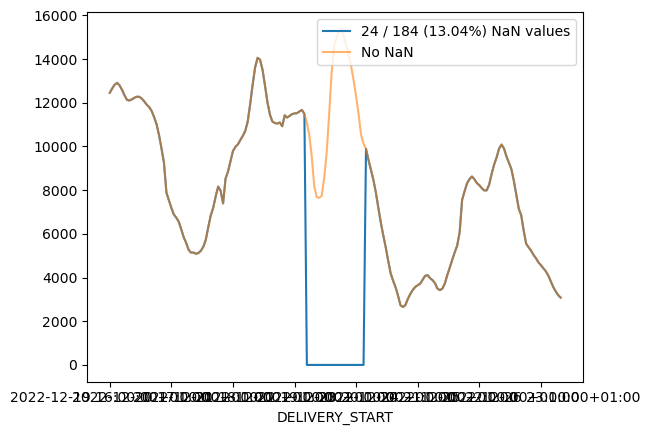

In [7]:
feature_name = 'wind_power_forecasts_average'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=80, nonan_ser=X_train_clean[feature_name])

24 / 10605 (0.23%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 24 - Largest NaN sequence: 24 - Average length of a sequence 24.00


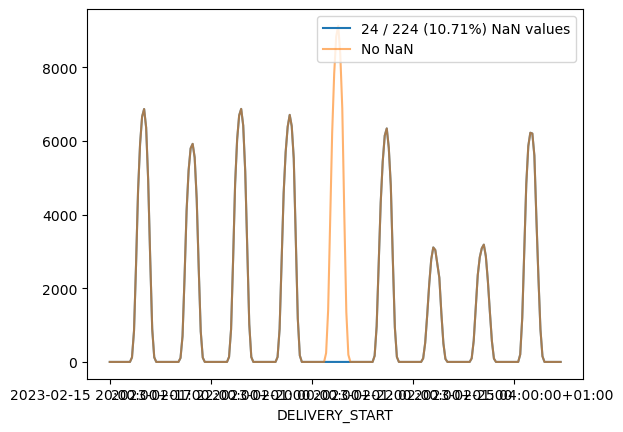

In [8]:
feature_name = 'solar_power_forecasts_average'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=100, nonan_ser=X_train_clean[feature_name])

24 / 10605 (0.23%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 24 - Largest NaN sequence: 24 - Average length of a sequence 24.00


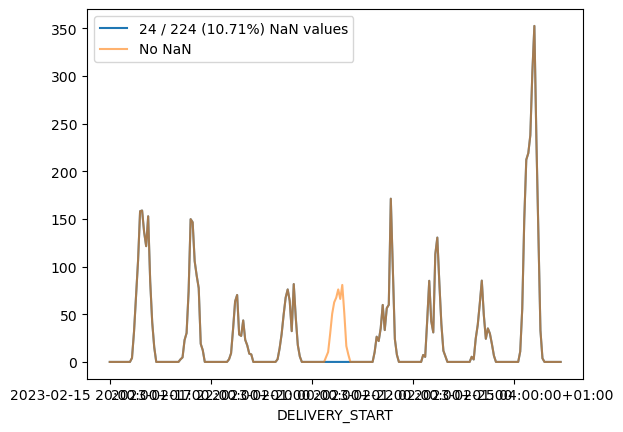

In [9]:
feature_name = 'solar_power_forecasts_std'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=100, nonan_ser=X_train_clean[feature_name])

24 / 10605 (0.23%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 24 - Largest NaN sequence: 24 - Average length of a sequence 24.00


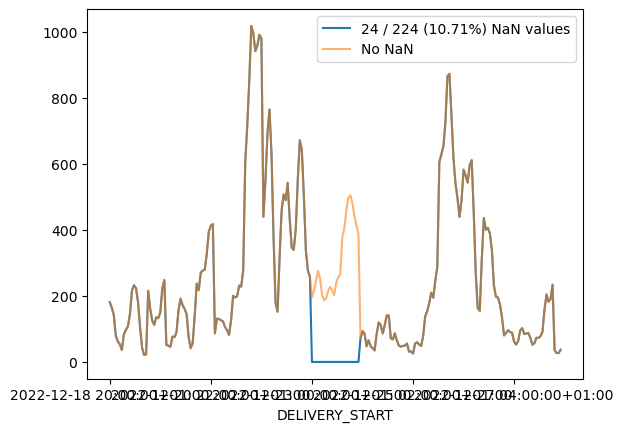

In [10]:
feature_name = 'wind_power_forecasts_std'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=100, nonan_ser=X_train_clean[feature_name])

1 / 10605 (0.01%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 1 - Largest NaN sequence: 1 - Average length of a sequence 1.00


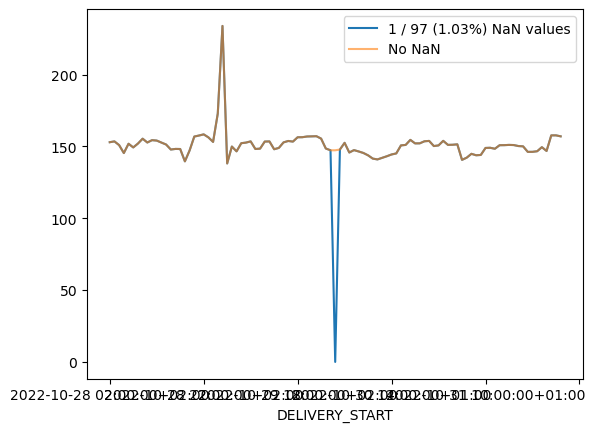

In [11]:
feature_name = 'Production horaire de biométhane (MWh - 0°C PCS)'
_ = visualize_nan(X_train[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=48, nonan_ser=X_train_clean[feature_name])

52 / 10605 (0.49%) NaN values
Number of NaN sequences: 3
Shortest NaN sequence: 1 - Largest NaN sequence: 48 - Average length of a sequence 17.33
IndexError error at 3


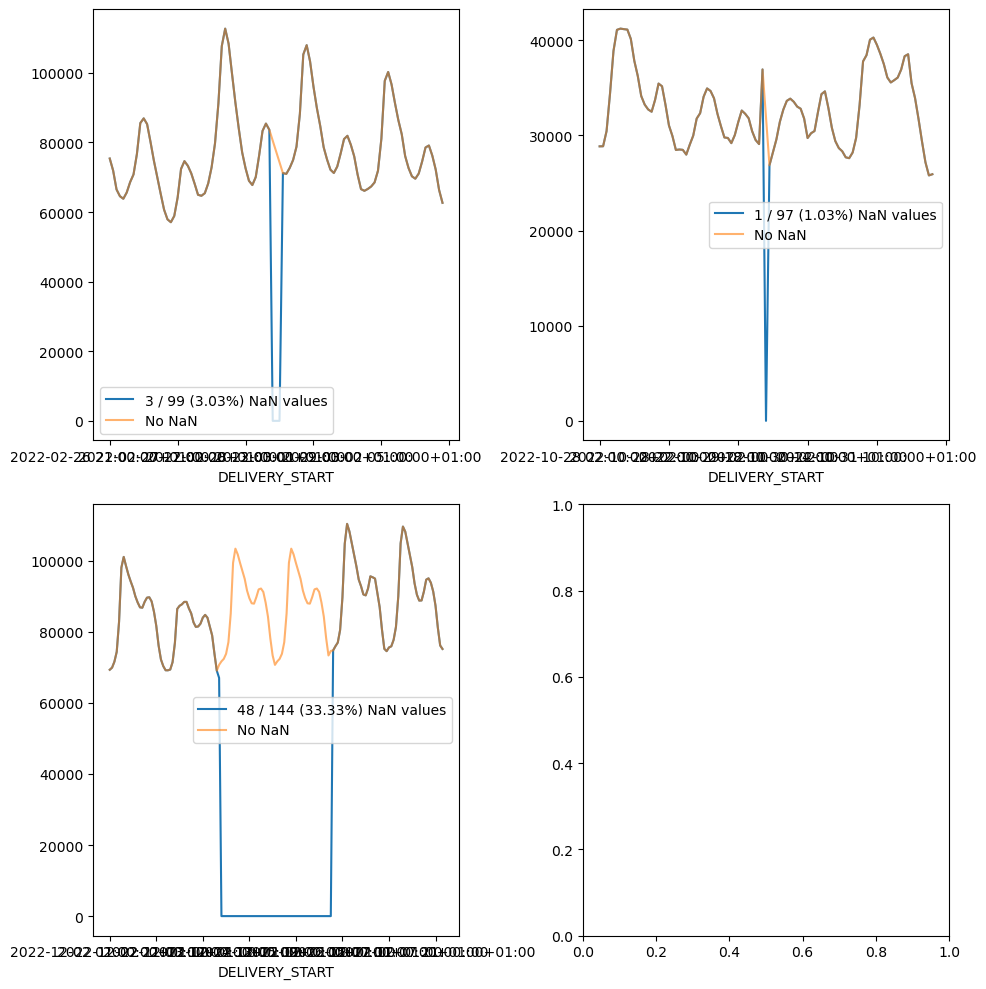

In [12]:
feature_name = 'Consommation brute gaz totale (MW PCS 0°C)'
_ = visualize_nan(X_train[feature_name], ncols=2, fill_value=0.0, method='fixed_length', margin=48, nonan_ser=X_train_clean[feature_name])

52 / 10605 (0.49%) NaN values
Number of NaN sequences: 3
Shortest NaN sequence: 1 - Largest NaN sequence: 48 - Average length of a sequence 17.33
IndexError error at 3


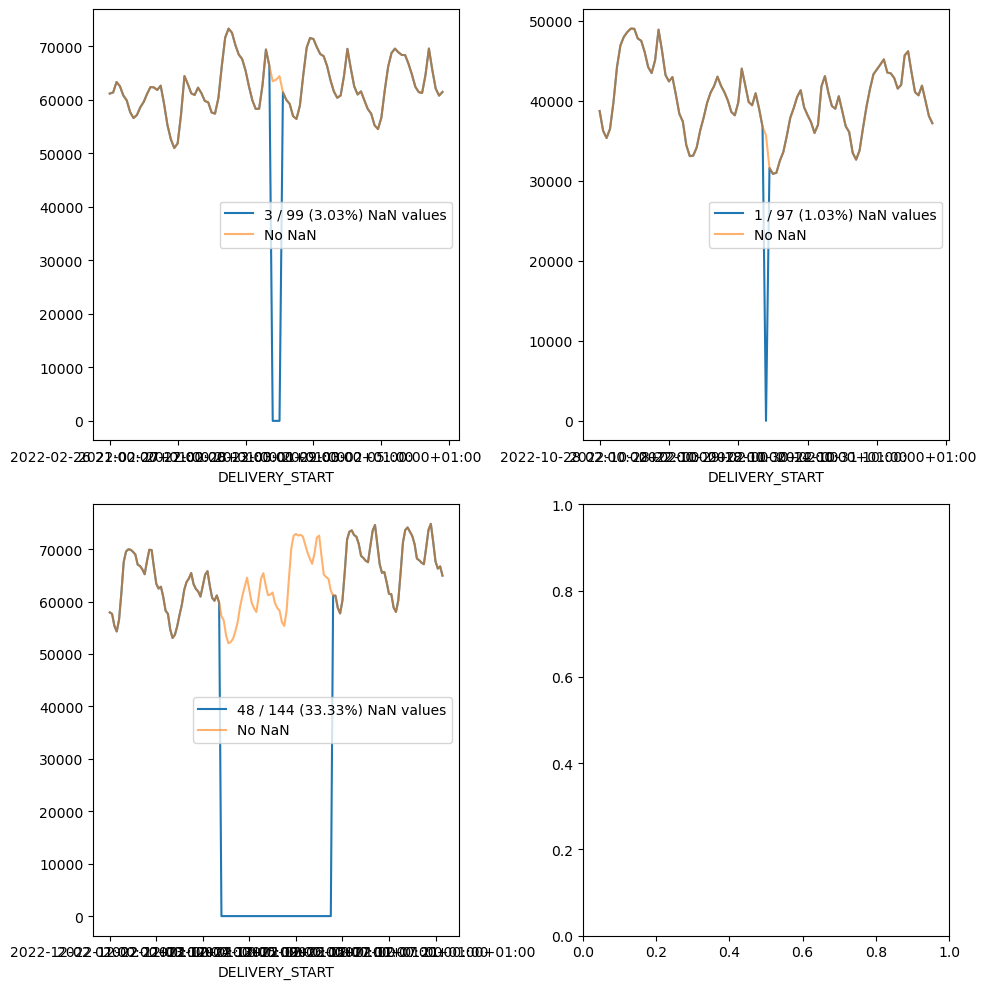

In [13]:
feature_name = 'Consommation brute électricité (MW) - RTE'
_ = visualize_nan(X_train[feature_name], ncols=2, fill_value=0.0, method='fixed_length', margin=48, nonan_ser=X_train_clean[feature_name])

17 / 25 (68.00%) NaN values
Number of NaN sequences: 9
Shortest NaN sequence: 1 - Largest NaN sequence: 2 - Average length of a sequence 1.89
IndexError error at 9


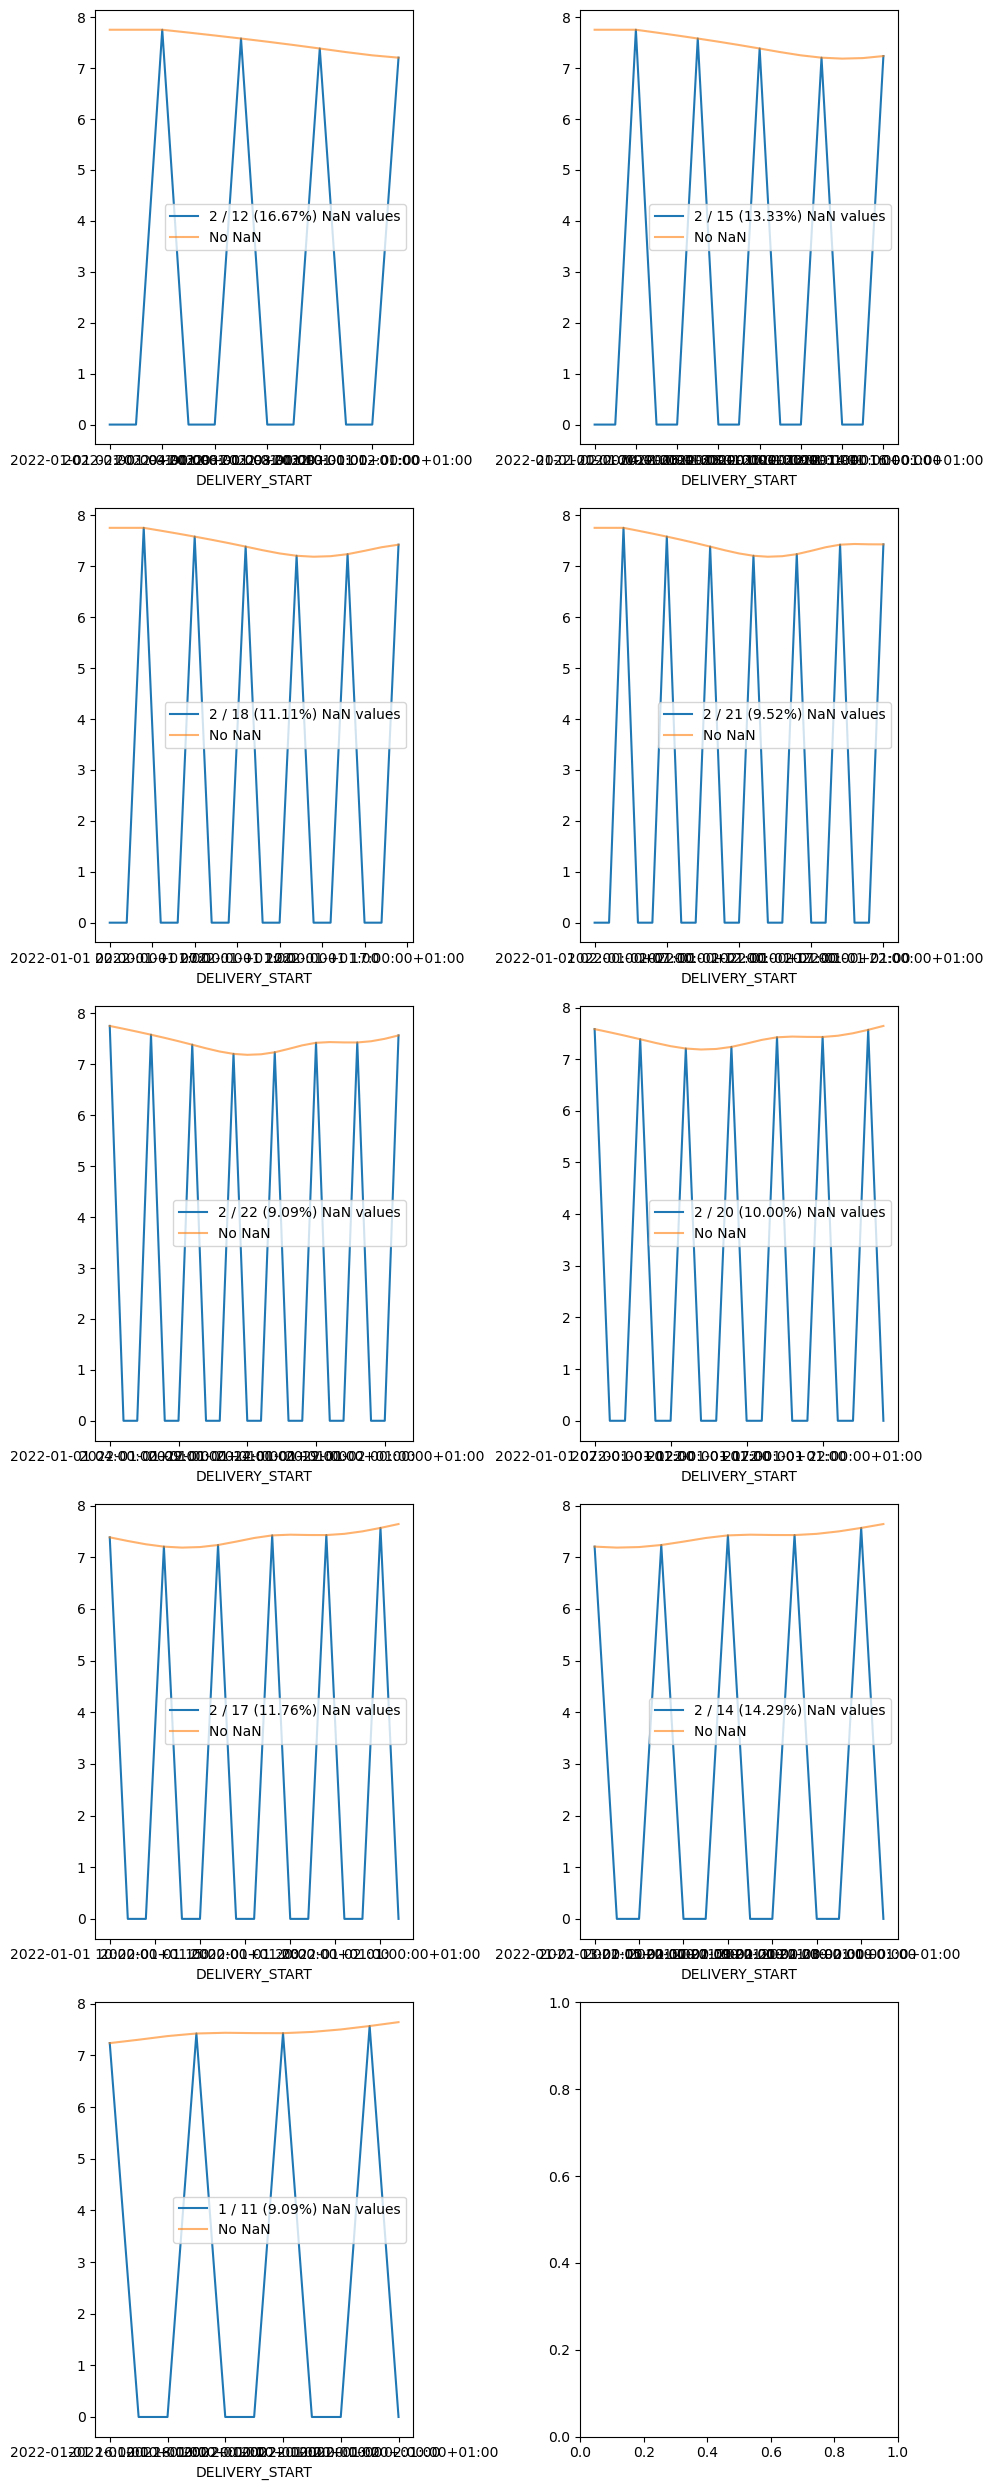

In [14]:
feature_name = 'Vitesse du vent à 100m (m/s)'
limit = 25
_ = visualize_nan(X_train[feature_name].iloc[:limit], ncols=2, fill_value=0.0, method='fixed_length', margin=10, nonan_ser=X_train_clean[feature_name].iloc[:limit])

17 / 25 (68.00%) NaN values
Number of NaN sequences: 9
Shortest NaN sequence: 1 - Largest NaN sequence: 2 - Average length of a sequence 1.89
IndexError error at 9


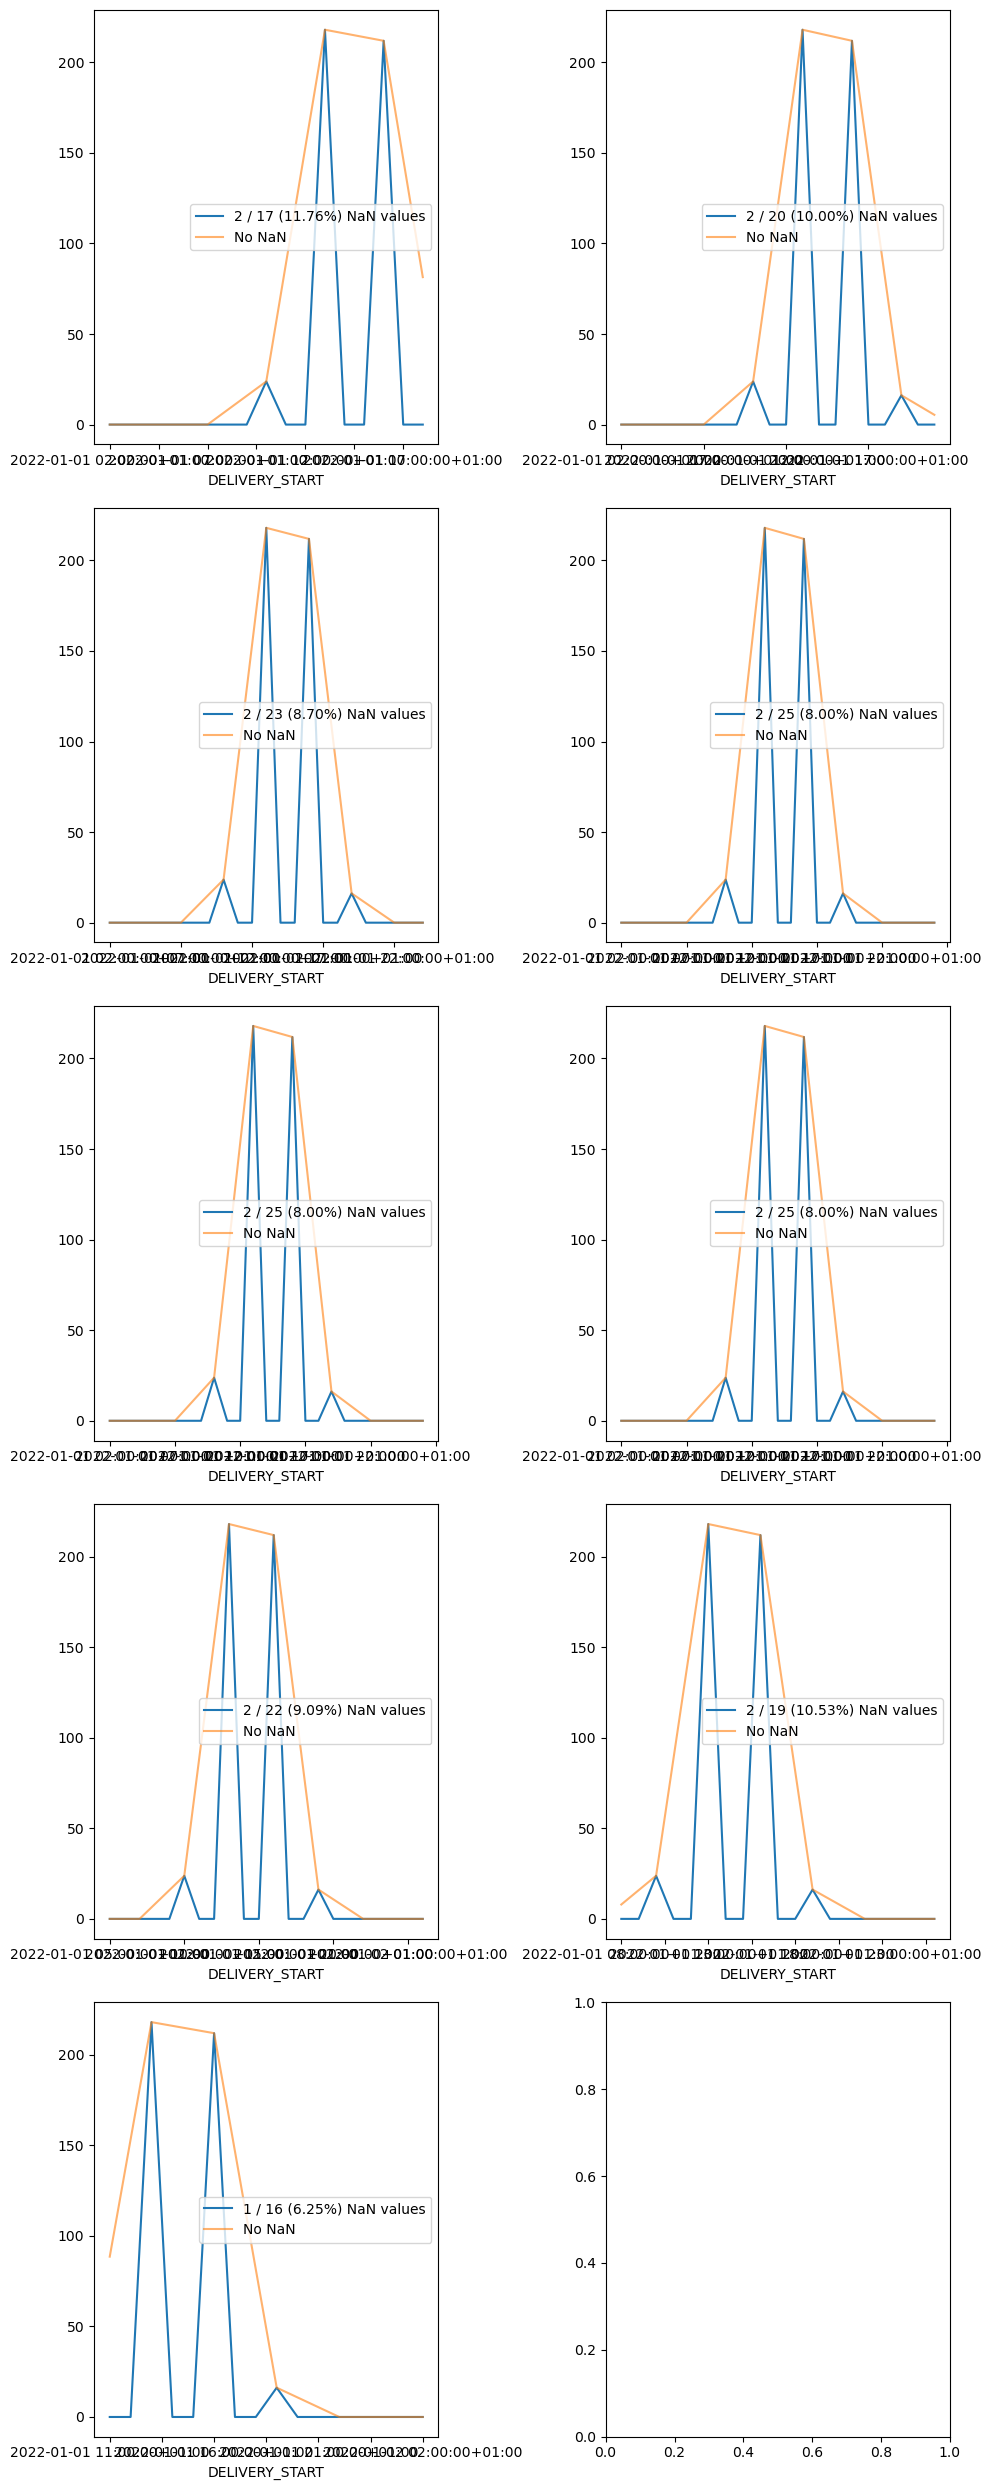

In [15]:
feature_name = 'Rayonnement solaire global (W/m2)'
limit = 25
_ = visualize_nan(X_train[feature_name].iloc[:limit], ncols=2, fill_value=0.0, method='fixed_length', margin=15, nonan_ser=X_train_clean[feature_name].iloc[:limit])

## Test data

In [16]:
# number of NaN per column
ipdisplay(pd.concat([X_train.isna().sum(), X_train_clean.isna().sum(), X_test.isna().sum(), X_test_clean.isna().sum()], axis=1, keys=['X_train', 'X_train_clean', 'X_test', 'X_test_clean']))

,X_train,X_train_clean,X_test,X_test_clean
Date (UTC),0,0.0,0,0.0
Date,0,0.0,0,0.0
load_forecast,1287,NaN,0,NaN
coal_power_available,1,0.0,0,0.0
gas_power_available,1,0.0,0,0.0
nucelear_power_available,1,0.0,0,0.0
wind_power_forecasts_average,24,0.0,0,0.0
solar_power_forecasts_average,24,0.0,24,0.0
wind_power_forecasts_std,24,0.0,0,0.0
solar_power_forecasts_std,24,0.0,24,0.0


24 / 4942 (0.49%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 24 - Largest NaN sequence: 24 - Average length of a sequence 24.00


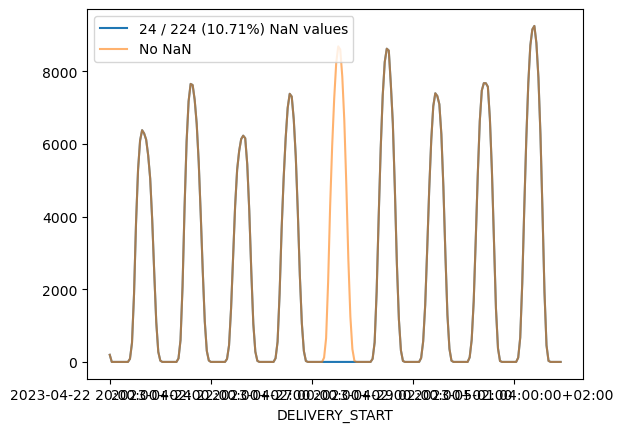

In [17]:
feature_name = 'solar_power_forecasts_average'
_ = visualize_nan(X_test[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=100, nonan_ser=X_test_clean[feature_name])

24 / 4942 (0.49%) NaN values
Number of NaN sequences: 1
Shortest NaN sequence: 24 - Largest NaN sequence: 24 - Average length of a sequence 24.00


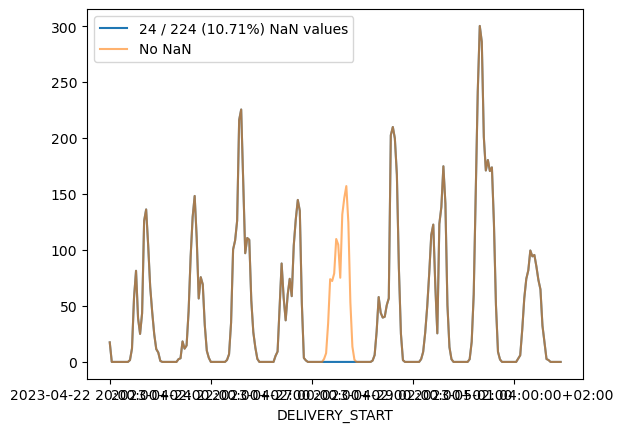

In [18]:
feature_name = 'solar_power_forecasts_std'
_ = visualize_nan(X_test[feature_name], ncols=1, fill_value=0.0, method='fixed_length', margin=100, nonan_ser=X_test_clean[feature_name])

17 / 25 (68.00%) NaN values
Number of NaN sequences: 9
Shortest NaN sequence: 1 - Largest NaN sequence: 2 - Average length of a sequence 1.89
IndexError error at 9


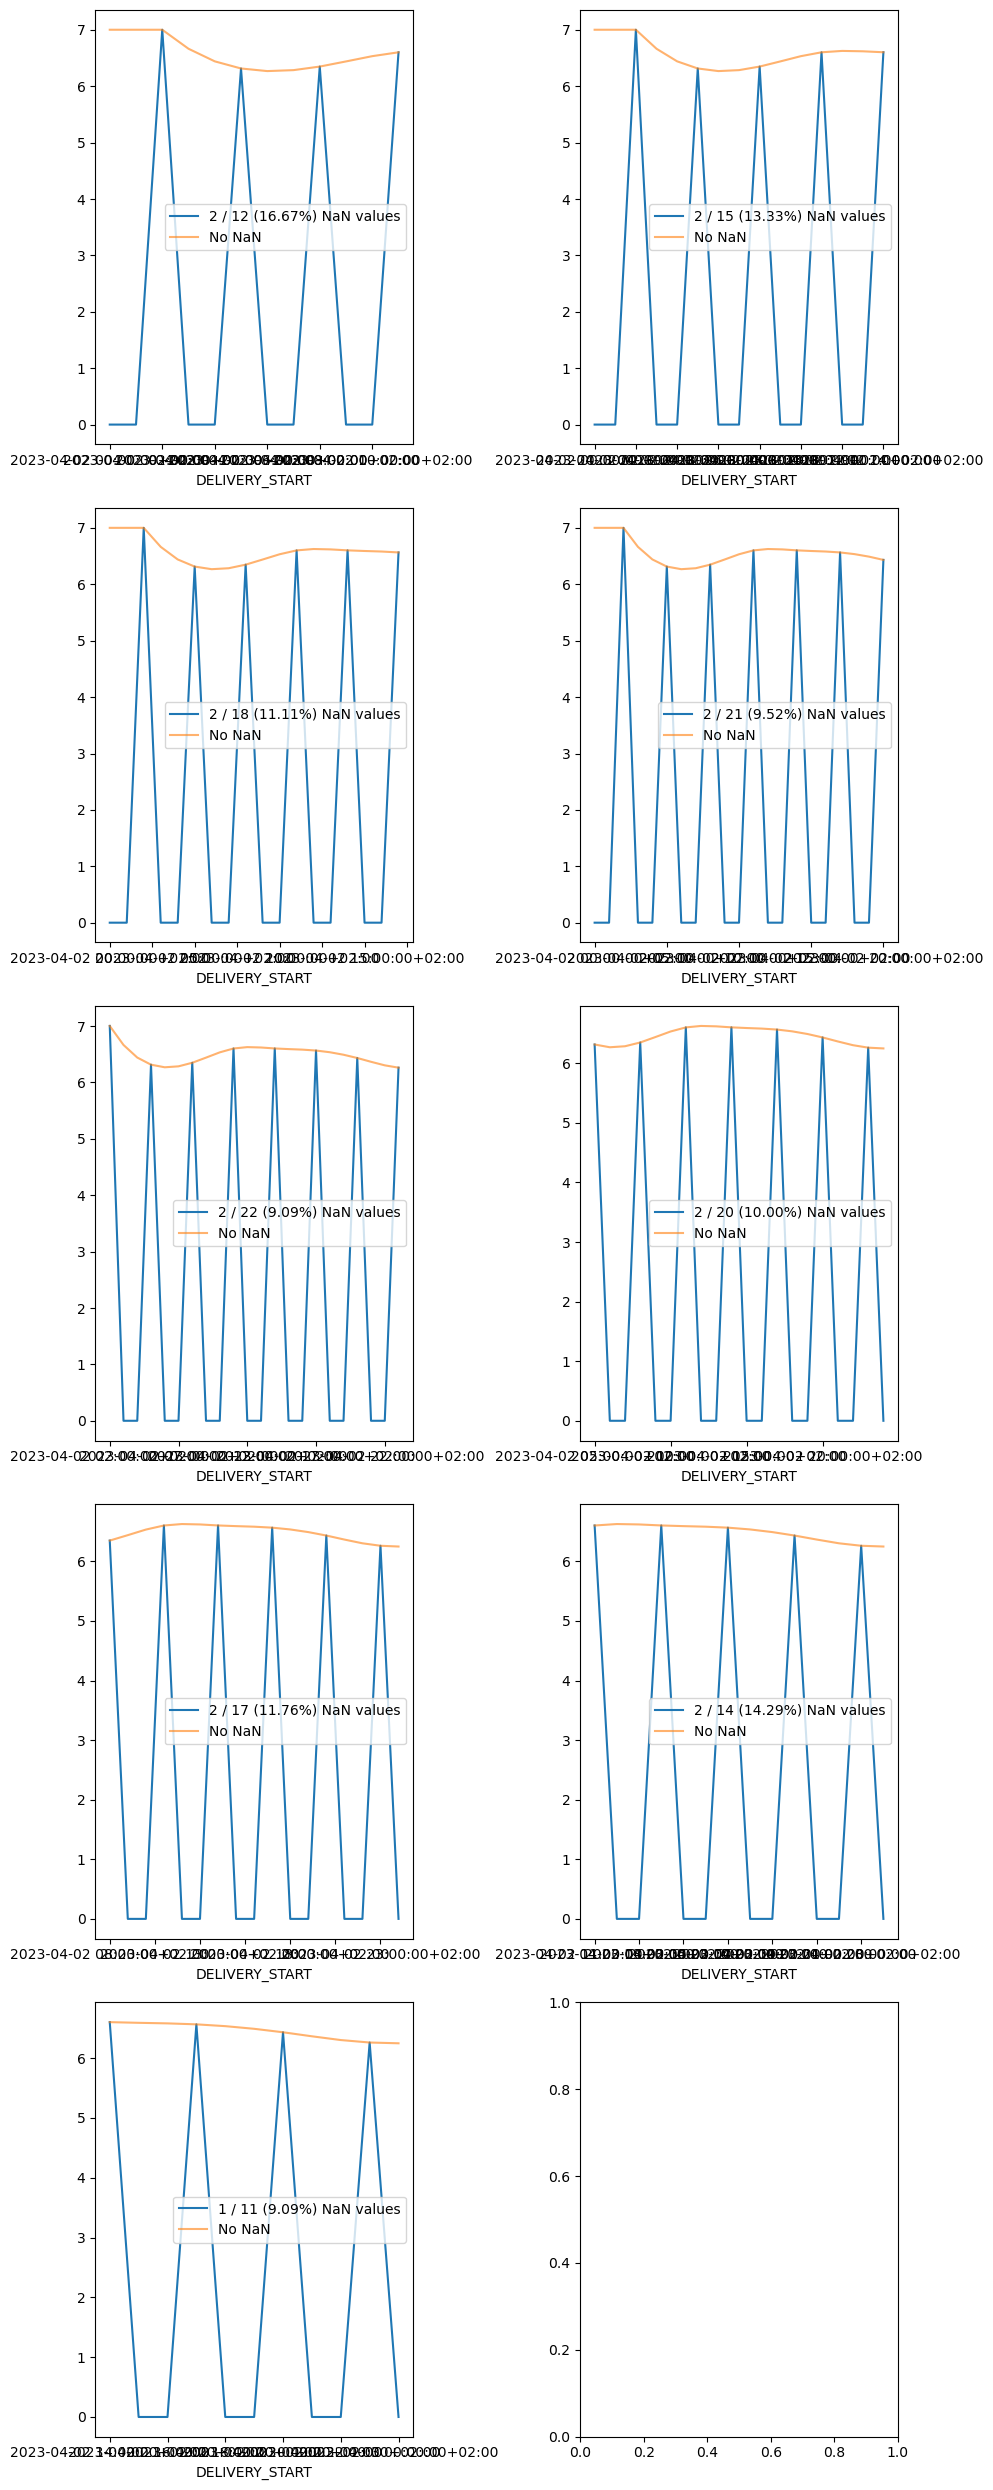

In [19]:
feature_name = 'Vitesse du vent à 100m (m/s)'
limit = 25
_ = visualize_nan(X_test[feature_name].iloc[:limit], ncols=2, fill_value=0.0, method='fixed_length', margin=10, nonan_ser=X_test_clean[feature_name].iloc[:limit])

17 / 25 (68.00%) NaN values
Number of NaN sequences: 9
Shortest NaN sequence: 1 - Largest NaN sequence: 2 - Average length of a sequence 1.89
IndexError error at 9


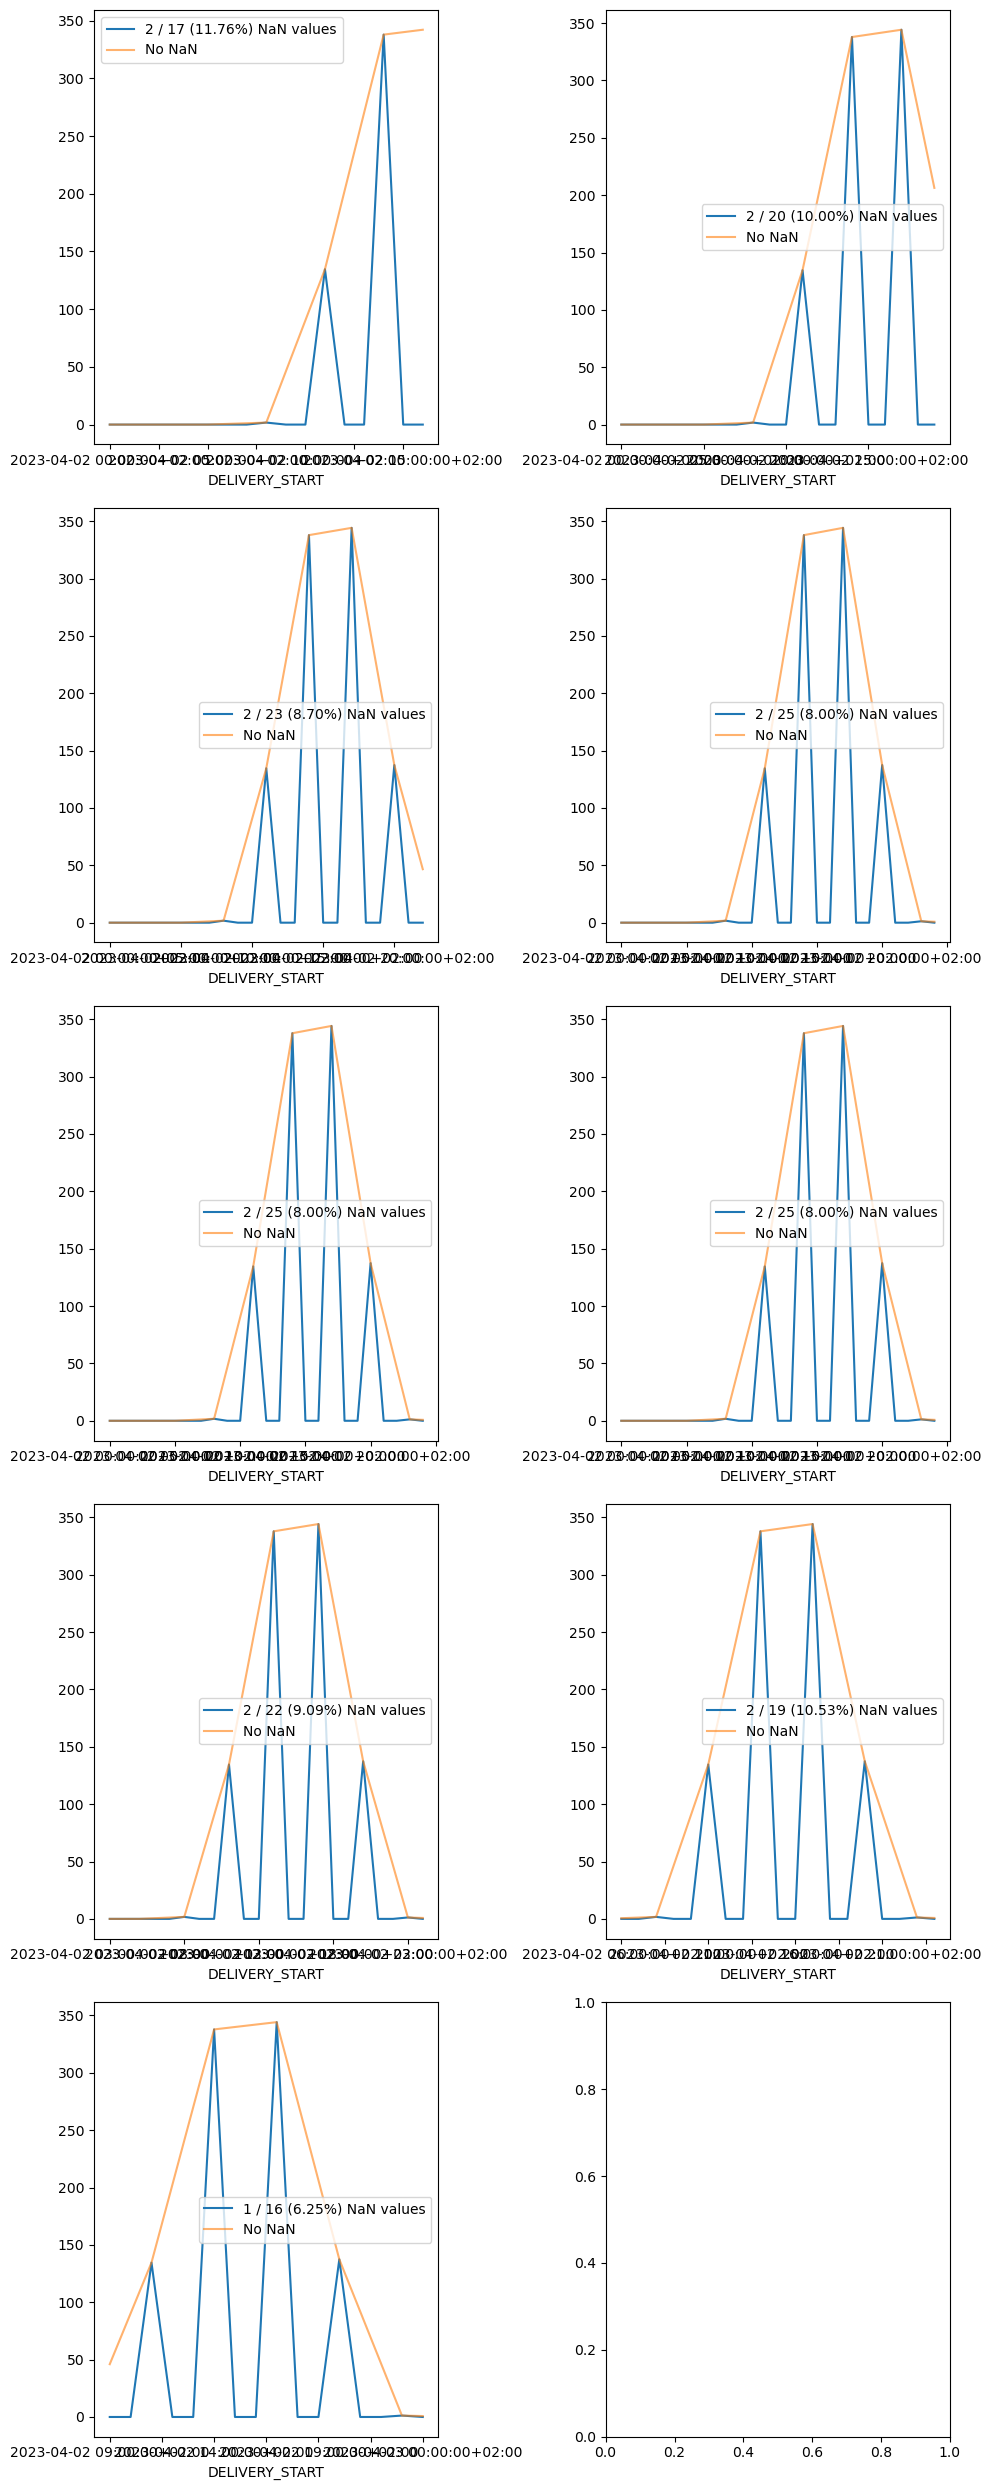

In [20]:
feature_name = 'Rayonnement solaire global (W/m2)'
limit = 25
_ = visualize_nan(X_test[feature_name].iloc[:limit], ncols=2, fill_value=0.0, method='fixed_length', margin=15, nonan_ser=X_test_clean[feature_name].iloc[:limit])

# Interpolation of `predicted_spot_price`: creation of `X_train_full_clean_ar_interp` and `X_test_full_clean_ar_interp`

### Training

In [3]:
X_train= Elmy_import('../data/raw/X_train_raw.csv', with_date=False)


8759 / 10605 (82.59%) NaN values
Number of NaN sequences: 4
Shortest NaN sequence: 48 - Largest NaN sequence: 8567 - Average length of a sequence 2189.75


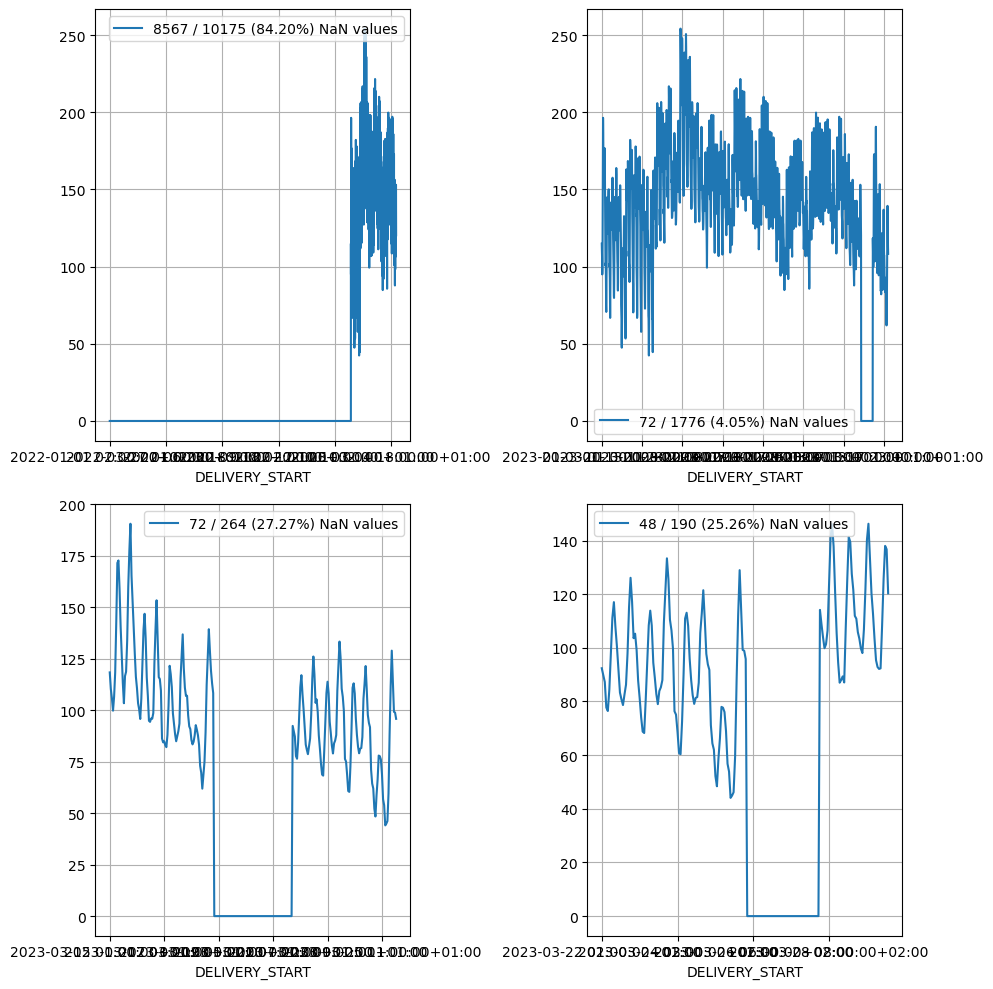

In [4]:
feature_name = 'predicted_spot_price'
_, slices = visualize_nan(X_train[feature_name], ncols=2, fill_value=0.0, method='nearest_non_nan', return_slices=True)

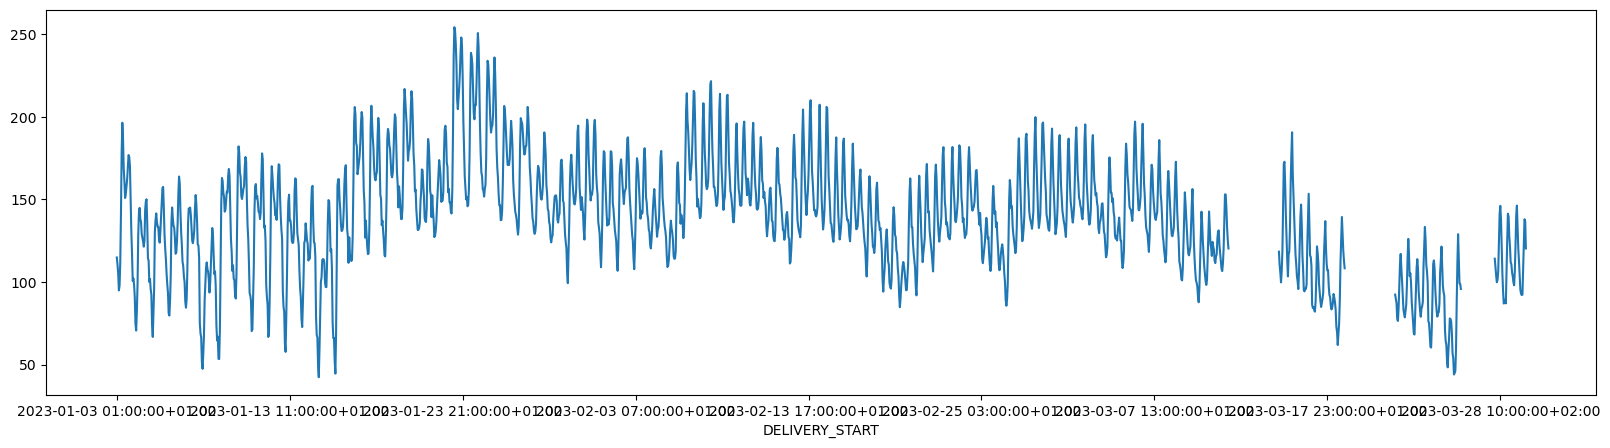

In [5]:
start_date = slices[1].index.values[0]
X_train.predicted_spot_price[start_date:].plot(figsize=(20, 5))
to_process_with_nan = X_train.predicted_spot_price[start_date:].copy()
to_process_with_nan.index = np.arange(len(to_process_with_nan))

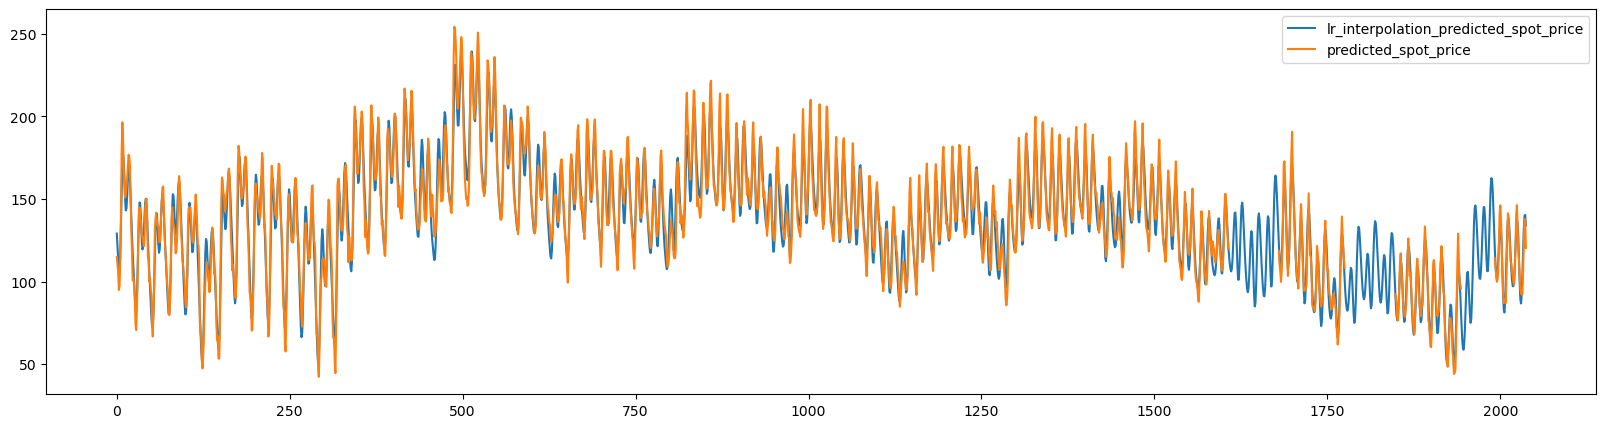

In [12]:
lr_interpolation, poly_interpolation = low_rank_interpolation(to_process_with_nan, K=10, polynomial_order=1)
plt.figure(figsize=(20, 5))
lr_interpolation.plot()
to_process_with_nan.plot()
plt.legend()
plt.savefig('lr_interpolation.pdf', format='pdf')

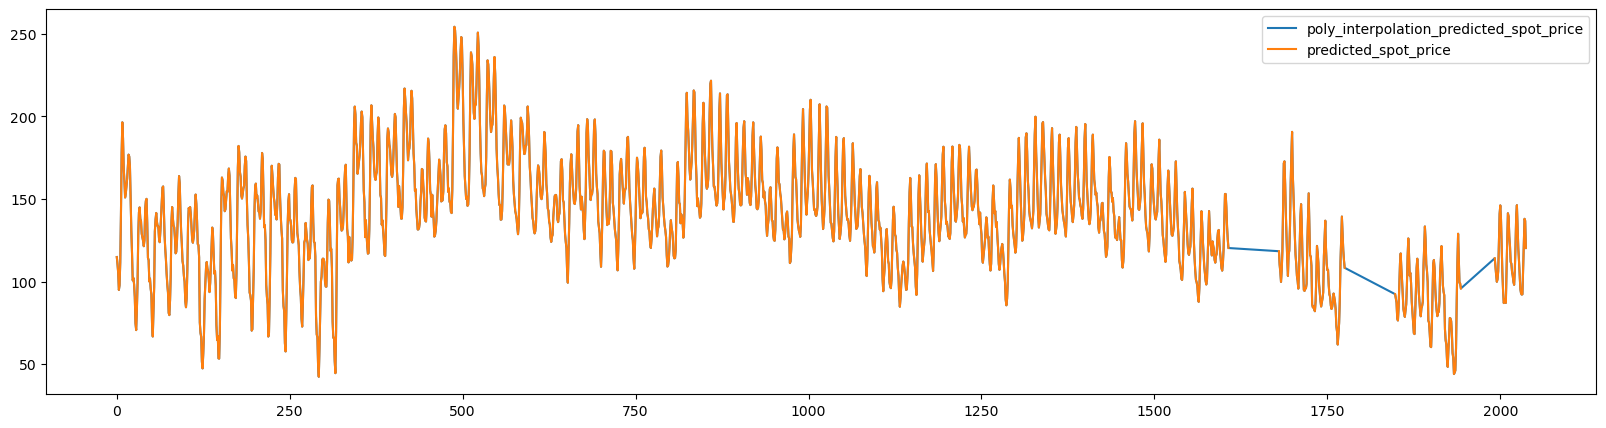

In [13]:
plt.figure(figsize=(20, 5))
poly_interpolation.plot()
to_process_with_nan.plot()
plt.legend()
plt.savefig('linear_interpolation.pdf', format='pdf')

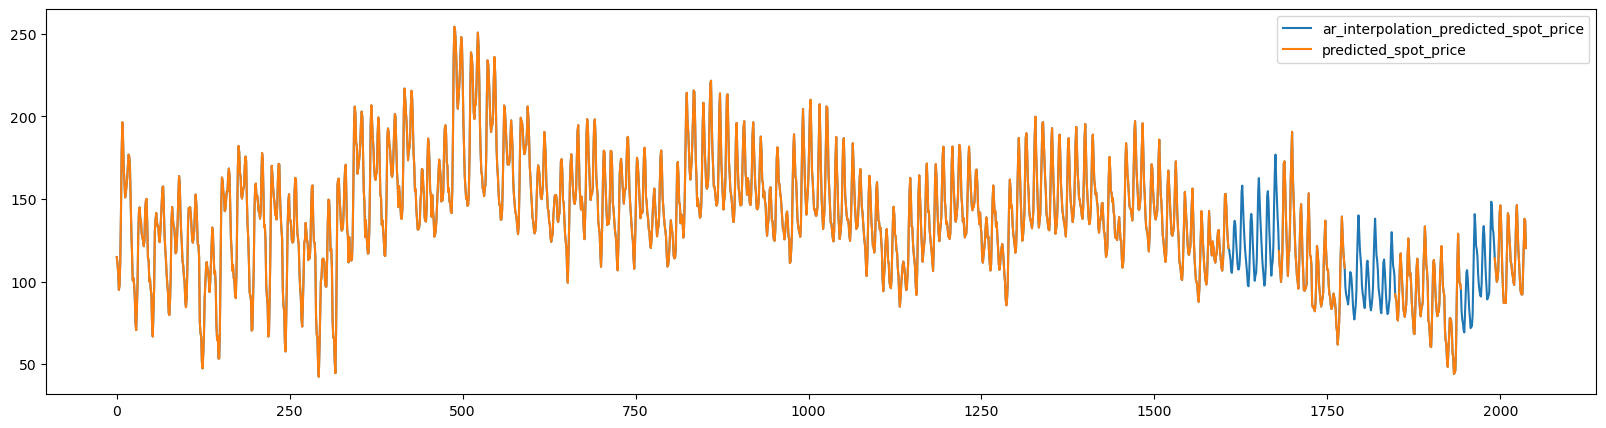

In [11]:
autoreg_interpolation, poly_interpolation = ar_interpolation_multiple_nan_seq(to_process_with_nan, p=70, polynomial_order=1)
plt.figure(figsize=(20, 5))

autoreg_interpolation.plot()
to_process_with_nan.plot()
plt.legend()

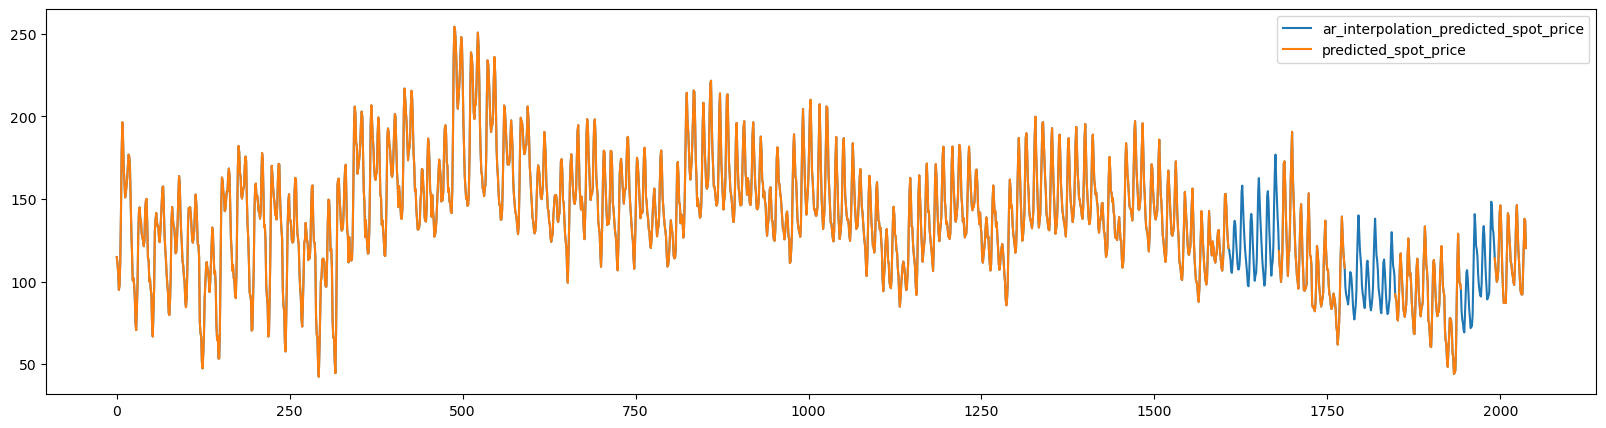

In [14]:
plt.figure(figsize=(20, 5))

autoreg_interpolation.plot()
to_process_with_nan.plot()
plt.legend()
plt.savefig('ar_interpolation.pdf', format='pdf')

In [6]:
X_train_clean.predicted_spot_price.loc[start_date:] = autoreg_interpolation.values

C:\Users\Tim\AppData\Local\Temp\ipykernel_6776\1568589665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_clean.predicted_spot_price.loc[start_date:] = autoreg_interpolation.values


In [7]:
X_train_clean.to_csv('../data/processed/X_train_full_clean_ar_interp.csv')

### Test

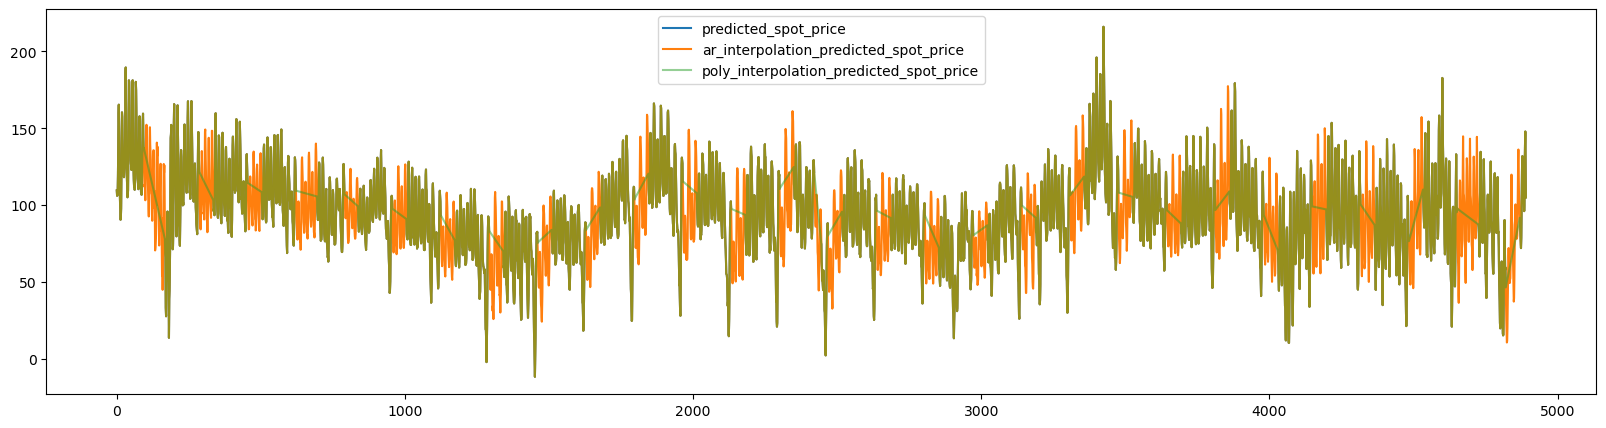

In [8]:
to_process_test = X_test.predicted_spot_price.iloc[51:].copy()
to_process_test.index = np.arange(len(to_process_test))
autoreg_interpolation, poly_interpolation = ar_interpolation_multiple_nan_seq(to_process_test, p=70, polynomial_order=1)
plt.figure(figsize=(20, 5))
to_process_test.plot()
autoreg_interpolation.plot()
poly_interpolation.plot(alpha=0.5)
plt.legend()

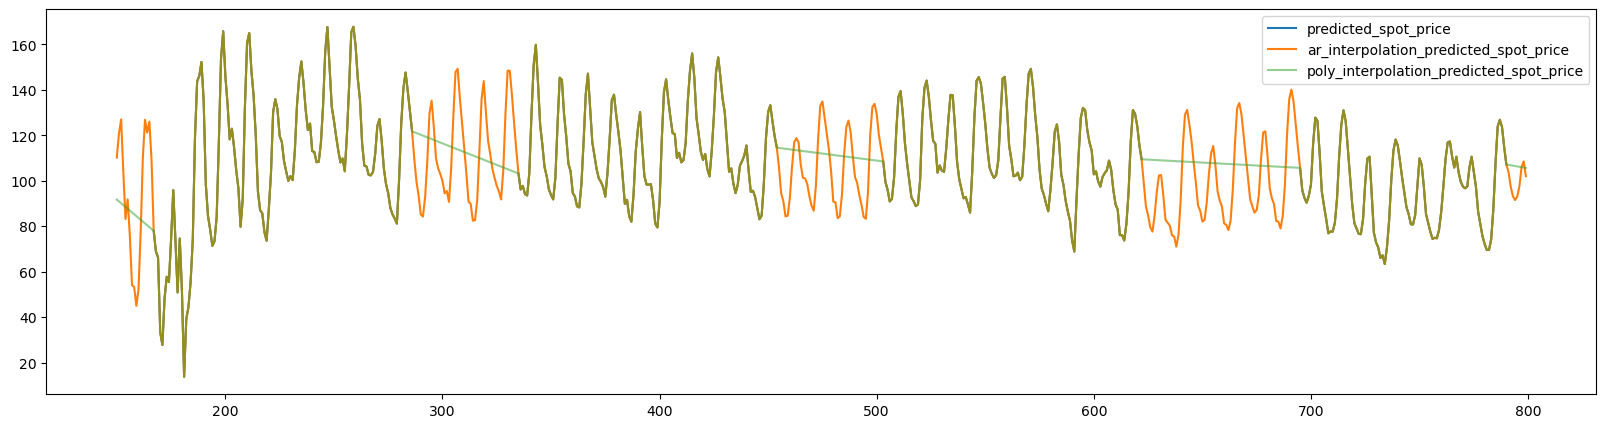

In [9]:
limitinf = 150
limitsup = 800
plt.figure(figsize=(20, 5))
to_process_test.iloc[limitinf:limitsup].plot()
autoreg_interpolation.iloc[limitinf:limitsup].plot()
poly_interpolation.iloc[limitinf:limitsup].plot(alpha=0.5)
plt.legend()

In [10]:
X_test_clean.predicted_spot_price.iloc[51:] = autoreg_interpolation.values

C:\Users\Tim\AppData\Local\Temp\ipykernel_6776\3686831008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_clean.predicted_spot_price.iloc[51:] = autoreg_interpolation.values


In [11]:
X_test_clean.to_csv('../data/processed/X_test_full_clean_ar_interp.csv')